In [ ]:
#This was my first coding attempt following Dr. Matt Russo's python tutorial. 
#It is unfinished, as I realized halfway through the process that live coding would be more conducive for this project. 

In [1]:
import pandas as pd
import numpy

filename = '25.10.29_cbpA∆lldA∆phz 8.58.35 PM'

df = pd.read_csv(filename + '.csv') #stores this data into a "data frame" in panda

n_impacts = len(df)
print(n_impacts, 'rows') #defines the number of rows in this data frame

df.head()

41 rows


,Time,1% Tryptone 1,1% Tryptone 2,1% Tryptone 3,1% Tryptone + 40mM Lactate 1,1% Tryptone + 40mM Lactate 2,1% Tryptone + 40mM Lactate 3,MOPS-40mM Lactate 1,MOPS-40mM Lactate 2,MOPS-40mM Lactate 3
0,0.5,0.11,0.11,0.11,0.12,0.11,0.11,0.10,0.10,0.11
1,1.0,0.12,0.11,0.11,0.13,0.12,0.12,0.10,0.10,0.10
2,1.5,0.13,0.12,0.12,0.15,0.12,0.13,0.11,0.11,0.12
3,2.0,0.15,0.13,0.14,0.19,0.14,0.16,0.12,0.12,0.12
4,2.5,0.17,0.16,0.15,0.24,0.18,0.20,0.14,0.15,0.14


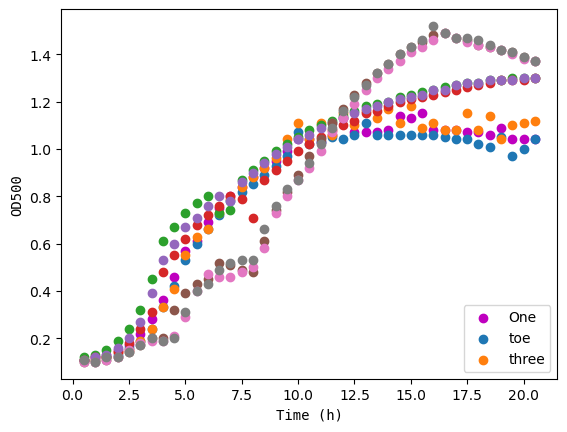

In [2]:
import matplotlib.pylab as plt

time = df['Time'].values #.values gives you all the values in the selected df

tryp1 = df['1% Tryptone 1'].values
tryp2 = df['1% Tryptone 2'].values
tryp3 = df['1% Tryptone 3'].values

tryplac1 = df['1% Tryptone + 40mM Lactate 1'].values
tryplac2 = df['1% Tryptone + 40mM Lactate 2'].values
tryplac3 = df['1% Tryptone + 40mM Lactate 3'].values

mopslac1 = df['MOPS-40mM Lactate 1'].values
mopslac2 = df['MOPS-40mM Lactate 2'].values
mopslac3 = df['MOPS-40mM Lactate 3'].values



plt.scatter(time, tryp1, label='One', color=(0.75,0,0.75))
plt.scatter(time, tryp2, label='toe')
plt.scatter(time, tryp3, label='three')

plt.scatter(time, tryplac1)
plt.scatter(time, tryplac2)
plt.scatter(time, tryplac3)

plt.scatter(time, mopslac1)
plt.scatter(time, mopslac2)
plt.scatter(time, mopslac3)

#plt.yscale('log')
#plt.minorticks_on()
plt.xlabel('Time (h)', family='monospace', fontsize=10)
plt.ylabel('OD500', family='monospace', fontsize=10)
plt.legend(loc='lower right',fontsize=10)
#plt.grid('on')
plt.show()

In [8]:
def map_value(value, min_value, max_value, min_result, max_result):

 result = min_result + (value - min_value)/(max_value - min_value) * (max_result - min_result)
 return result

0.41 hours per beat


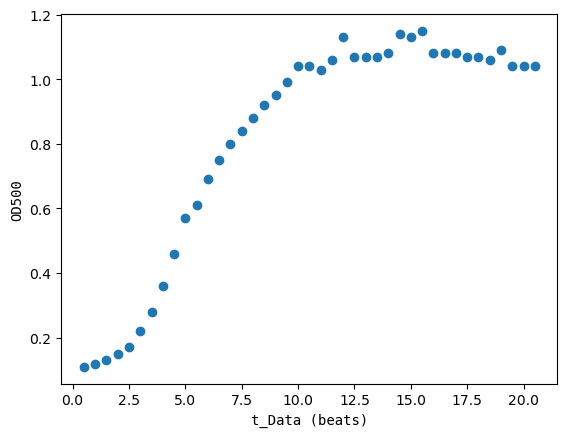

In [10]:
duration_beats = 50 #desired number of beats bc midi reads time in terms of beats

t_data = map_value(time, 0, max(time), 0, duration_beats)

t_data

time_per_beat = max(time)/duration_beats
print (time_per_beat, 'hours per beat')

plt.scatter(time, tryp1)

plt.xlabel('t_Data (beats)', family='monospace', fontsize=10)
plt.ylabel('OD500', family='monospace', fontsize=10)
plt.show()


In [5]:
bpm = 60 #so that 1 beat = 1 second
duration_sec = duration_beats * 60/bpm #gives you the duration in seconds
print ('Duration:', duration_sec, 'seconds')

Duration: 50.0 seconds


In [9]:
import itertools as it

MIDI_A4 = 69

def str2midi(note_string): #gives you the midinumber basedon the string name.

    data = note_string.strip().lower()
    name2delta = {"c": -9, "d": -7, "e": -5, "f": -4, "g": -2, "a": 0, "b": 2}
    accident2delta = {"b": -1, "#": 1, "x": 2}
    accidents = list(it.takewhile(lambda el: el in accident2delta, data[1:]))
    octave_delta = int(data[len(accidents) + 1:]) - 4
    return (MIDI_A4 +
          name2delta[data[0]] + # Name
          sum(accident2delta[ac] for ac in accidents) + # Accident
          12 * octave_delta # Octave
           )

In [7]:
note_names = ['C2','D2', 'E2','F#2','G#2',
              'A#2','C3','D3','E3','F#3',
              'G#3','A#3','C4','D4','E4', 
              'F#4','G#4','A#4','C5','D5',
               'E5','F#5','G#5','A#5','C6'
             ]

note_midis = [str2midi(n) for n in note_names] 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')
print ('Midi Numbers', note_midis)

Resolution: 25 notes
Midi Numbers [36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]


In [11]:
midi_data = []
for i in range(n_impacts):
    note_index = round(map_value(tryp1[i], 0, 1, n_notes-1, 0)) 
    midi_data.append(note_midis[note_index])